In [19]:
#@title Importing Packages
import numpy as np
import matplotlib.pyplot as plt

In [54]:
#@title Functions
def GramSchmidt(A):
  r, c = A.shape
  Q = np.zeros([r, c])
  for i in range(c):
    Q[:,i] = A[:,i] - np.sum((A[:,i].T @ Q[:,:i]) * Q[:,:i], axis = 1)
    Q[:,i] /= np.linalg.norm(Q[:,i]) 
  R = Q.T @ A
  return Q, R

def ModifiedGramSchmidt(A):
  r, c = A.shape
  V = np.matrix(A.copy())
  Q = np.matrix(np.zeros([r,c]))
  R = np.matrix(np.zeros([c,c]))
  for j in range(c):
    Q[:,j] = V[:,j] / np.linalg.norm(V[:,j]) 
    R[j,j:] = Q[:,j].T @ V[:,j:]  
    V[:,j:] -= ((V[:,j:].T @ Q[:,j]) @ Q[:,j].T).T   
  return Q, R

In [ ]:
#@title A test matrix
A = np.array([[1.0,2.0,3.0,4.0,5.0],[1.0,5.0,6.0,61.0,9.0],[7.0,8.0,17.0,22.0,-7.0],[16.0,17.0,19.0,25.0,2.0],[1.0,9.0,0.8,7.6,3.0]])
Q1 = GramSchmidt(A)
R1 = Q1.T @ A
er1 = np.linalg.norm(A - Q1 @ R1) / np.linalg.norm(A)
Q2 = ModifiedGramSchmidt(A)
R2 = Q2.T @ A
er2 = np.linalg.norm(A - Q2 @ R2) / np.linalg.norm(A)
print(f'Gram Schmidt Error: {er1}\nModified Gram Schmidt Error: {er2}')

Gram Schmidt Error: 4.712294070332071e-16
Modified Gram Schmidt Error: 1.5203284867941944e-16


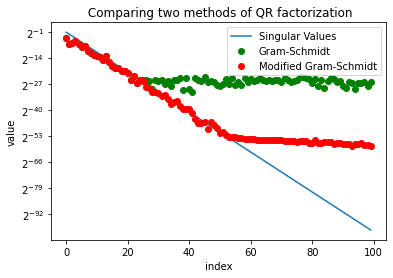

In [55]:
#@title Comparing two methods of QR factorization
n = 100
U, X = np.linalg.qr(np.random.randn(n,n))
# set U to a random orthogonal matrix
V, X = np.linalg.qr(np.random.randn(n,n))
# set V to a random orthogonal matrix
S = np.diag(np.power(2,np.arange(-1,-(n+1),-1), dtype=float))
# Set S to a diagonal matrix values between 2−1 and 2−(n+1)
A = np.matmul(U,np.matmul(S,V))

Q1, R1 = GramSchmidt(A)
Q2, R2 = ModifiedGramSchmidt(A)

plt.semilogy(np.diag(np.abs(S)), basey = 2, label = 'Singular Values')
plt.semilogy(np.diag(np.abs(R1)), 'go', basey = 2, label = 'Gram-Schmidt')
plt.semilogy(np.diag(np.abs(R2)), 'ro', basey = 2,label = 'Modified Gram-Schmidt')
plt.xlabel('index')
plt.ylabel('value')
plt.title(' Comparing two methods of QR factorization')
plt.legend()
plt.show()